In [1]:
# MUXUE GUO ET RONNIE LIU
# Devoir 1 - Codes
# Notebook pour le code MNIST et ADULT afin de
# simplifier la compilation

MNIST

Dimensions des y_trainval, y_train, y_valid, y_test
(200,)
(150,)
(50,)
(50,)

Dans les données du test...
Nombre d'occurences du chiffre 0: 5
Nombre d'occurences du chiffre 1: 9
Nombre d'occurences du chiffre 2: 5
Nombre d'occurences du chiffre 3: 4
Nombre d'occurences du chiffre 4: 9
Nombre d'occurences du chiffre 5: 4
Nombre d'occurences du chiffre 6: 3
Nombre d'occurences du chiffre 7: 6
Nombre d'occurences du chiffre 8: 0
Nombre d'occurences du chiffre 9: 5

TEST DE MAJORITÉ:
Précision sur les données de test: 18.0%

MNIST: DISSIMILARITÉ ORIGINALE

MATRICE DE DISSIMILARITÉ ORIGINALE (Apprentissage)
Itération 50 terminée!
Itération 100 terminée!
Itération 150 terminée!
Itération 200 terminée!
Fin du calcul de la matrice
Dimension de la matrice: (200, 200)

MATRICE DE DISSIMILARITÉ ORIGINALE (Entraînement)
Itération 50 terminée!
Itération 100 terminée!
Itération 150 terminée!
Fin du calcul de la matrice
Dimension de la matrice: (150, 150)

MATRICE DE DISSIMILARITÉ ORIGINALE (

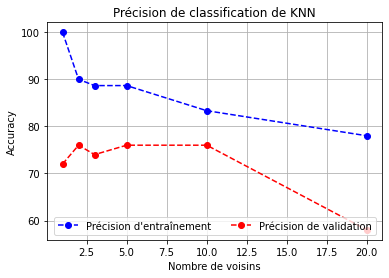

Hyperparamètre choisi: 5 voisins
Précision sur les données d'apprentissage: 89.0%
Précision sur les données de test: 74.0%

ALGORITHME 4: PCoA


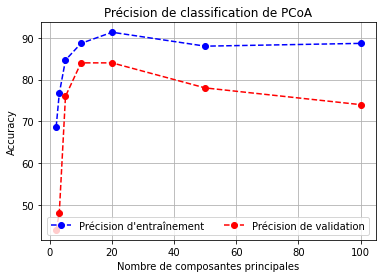

Hyperparamètre choisi: 20 composantes principales et 2 voisins
Précision sur les données d'apprentissage: 96.0%
Précision sur les données de test: 86.0%

ALGORITHME 5: Isomap


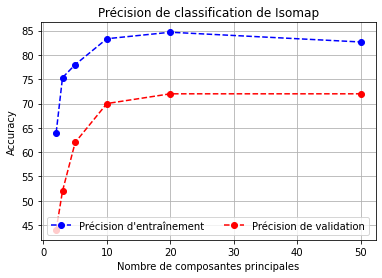

Hyperparamètre choisi: 50 composantes et 5 voisins
Précision sur les données d'apprentissage: 89.5%
Précision sur les données de test: 72.0%

MNIST: DISTANCE EUCLIDIENNE

MATRICE DE DISSIMILARITÉ EUCLIDIENNE (Apprentissage)
Itération 50 terminée!
Itération 100 terminée!
Itération 150 terminée!
Itération 200 terminée!
Fin du calcul de la matrice
Dimension de la matrice: (200, 200)

MATRICE DE DISSIMILARITÉ EUCLIDIENNE (Entraînement)
Itération 50 terminée!
Itération 100 terminée!
Itération 150 terminée!
Fin du calcul de la matrice
Dimension de la matrice: (150, 150)

MATRICE DE DISSIMILARITÉ EUCLIDIENNE (Validation)
Itération 50 terminée!
Fin du calcul de la matrice
Dimension de la matrice: (50, 150)

MATRICE DE DISSIMILARITÉ EUCLIDIENNE (Test)
Itération 50 terminée!
Fin du calcul de la matrice
Dimension de la matrice: (50, 200)

ALGORITHME 1: KMédoïdes
Précision sur les données d'apprentissage: 16.5%
Précision sur les données de test: 8.0%

ALGORITHME 2: Partition Binaire
Précision sur 

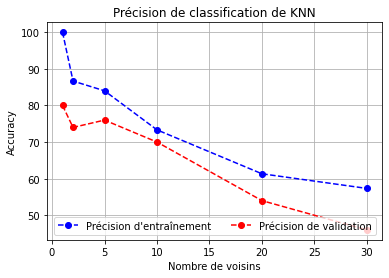

Hyperparamètre choisi: 1 voisin
Précision sur les données d'apprentissage: 100.0%
Précision sur les données de test: 72.0%

ALGORITHME 4: PCoA


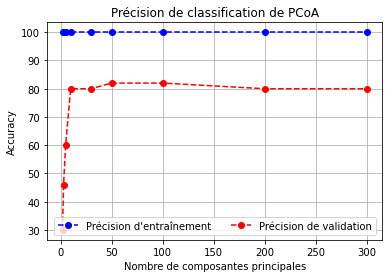

Hyperparamètre choisi: 50 composantes principales et 1 voisin
Précision sur les données d'apprentissage: 100.0%
Précision sur les données de test: 76.0%

ALGORITHME 5: Isomap


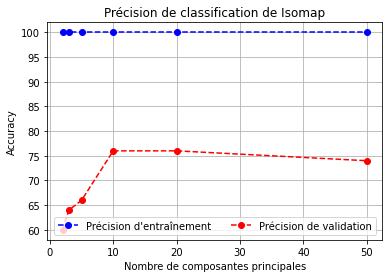

Hyperparamètre choisi: 10 composantes et 1 voisin
Précision sur les données d'apprentissage: 100.0%
Précision sur les données de test: 60.0%


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Liste de fonctions stockées dans le fichier algorithms.py
import algorithms as al

from sklearn.model_selection import train_test_split

#########################################################
#######################   MNIST  ########################
#########################################################
print('MNIST')

# Échantillonnage des données MNIST

# Les données d'apprentissage est composée des données de train et de valid.
# Lorsqu'un algorithme n'a pas d'hyperparamètres à tester, on apprend directement
# avec x_trainval.

# Lorsqu'il y a présence des hyperparamètres:
# Pour chaque valeur d'hyperparamètre:
# 1. Apprendre sur x_train
# 2. Calculer la précision par rapport aux prédictions sur x_valid
# 3. Trouver le meilleur hyperparamètre

# Pour la prédiction:
# 1. Apprendre sur x_trainval avec l'hyperparamètre à valeur optimale.
# 2. Prédire sur x_test

# On va prendre les 200 premières données de mnist_train.csv comme données d'apprentissage.
# Ensuite, on les split en 150-50 pour les données d'entraînement et les données de validation

# On va prendre les 50 premières données de mnist_test.csv comme données de test.

n_trainval = 200
mnist_trainval = pd.read_csv('mnist_train.csv')
mnist_trainval = mnist_trainval.head(n_trainval)
x_trainval = mnist_trainval.drop('label', axis = 1).values
y_trainval = mnist_trainval.loc[:, 'label'].values

x_train, x_valid, y_train, y_valid = train_test_split(x_trainval, y_trainval, test_size=(1/4), random_state=0)

n_test = 50
mnist_test = pd.read_csv('mnist_test.csv')
mnist_test = mnist_test.head(n_test)
x_test = mnist_test.drop('label', axis = 1).values
y_test = mnist_test.loc[:, 'label'].values

print('\nDimensions des y_trainval, y_train, y_valid, y_test')
print(y_trainval.shape)
print(y_train.shape)
print(y_valid.shape)
print(y_test.shape)


# NETTOYAGE DES DONNÉES (convertir les pixels de 0 à 255, à avoir uniquement
# des chiffres binaires (0 ou 1))
# Source: TP1
def clean_data_MNIST(x):
    for i in range(len(x)):
        for j in range(len(x[0])):
            if x[i][j] != 0:
                x[i][j] = round(int(x[i][j])/255.0)
    return x

x_trainval = clean_data_MNIST(x_trainval)
x_train = clean_data_MNIST(x_train)
x_valid = clean_data_MNIST(x_valid)
x_test = clean_data_MNIST(x_test)



# TEST DE MAJORITÉ: prendre le chiffre ayant le plus nombre d'occurences et l'utiliser
# comme prédictions pour n'importe quel exemple.
print('\nDans les données du test...')
for i in range(0, 10):
    print(f'Nombre d\'occurences du chiffre {i}: {np.count_nonzero(y_test == i)}')

# Chiffre majoritaire: 1
y_train_majority = np.full(len(y_train), 1)
y_test_majority = np.full(len(y_test), 1)
acc_majority = al.calculate_accuracy(y_train, y_test, y_train_majority, y_test_majority)
print(f'\nTEST DE MAJORITÉ:')
print(f'Précision sur les données de test: {acc_majority[1]}%')


#########################################################
##############   DISSIMILARITÉ ORIGINALE  ###############
#########################################################
print('\nMNIST: DISSIMILARITÉ ORIGINALE')

# MATRICE DE DISSIMILARITÉ ORIGINALE
print('\nMATRICE DE DISSIMILARITÉ ORIGINALE (Apprentissage)')
mnist_diss_trainval = al.generate_matrix(al.dissimilarity_mnist, x_trainval)

print('\nMATRICE DE DISSIMILARITÉ ORIGINALE (Entraînement)')
mnist_diss_train = al.generate_matrix(al.dissimilarity_mnist, x_train)

print('\nMATRICE DE DISSIMILARITÉ ORIGINALE (Validation)')
mnist_diss_valid = al.generate_matrix(al.dissimilarity_mnist, x_valid, x_train)

print('\nMATRICE DE DISSIMILARITÉ ORIGINALE (Test)')
mnist_diss_test = al.generate_matrix(al.dissimilarity_mnist, x_test, x_trainval)



# Algorithme 1: KMédoïdes
print('\nALGORITHME 1: KMédoïdes')
mnist_kmedoids = al.predict_kmedoids([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], mnist_diss_trainval, mnist_diss_test)
acc_kmedoids = al.calculate_accuracy(y_trainval, y_test, mnist_kmedoids[0], mnist_kmedoids[1])

print(f'Précision sur les données d\'apprentissage: {acc_kmedoids[0]}%')
print(f'Précision sur les données de test: {acc_kmedoids[1]}%')


# Algorithme 2: Partition Binaire
print('\nALGORITHME 2: Partition Binaire')
mnist_agglo = al.predict_agglo(10, mnist_diss_trainval, mnist_diss_test)
acc_agglo = al.calculate_accuracy(y_trainval, y_test, mnist_agglo[0], mnist_agglo[1])

print(f'Précision sur les données d\'apprentissage: {acc_agglo[0]}%')
print(f'Précision sur les données de test: {acc_agglo[1]}%')


# Algorithme 3: KNN
print('\nALGORITHME 3: kNN')

# Tester pour différents valeurs d'hyperparamètres
voisins = np.array([1, 2, 3, 5, 10, 20])
acc_train = np.zeros(len(voisins))
acc_valid = np.zeros(len(voisins))

for i in range(len(voisins)):
    mnist_knn = al.predict_knn(voisins[i], mnist_diss_train, mnist_diss_valid, y_train, True)
    acc_knn = al.calculate_accuracy(y_train, y_valid, mnist_knn[0], mnist_knn[1])

    acc_train[i] = acc_knn[0]
    acc_valid[i] = acc_knn[1]

# Graphique des précisions d'entraînement et de validation
plt.plot(voisins, acc_train, linestyle='--', marker='o', color='b', label="Précision d'entraînement")
plt.plot(voisins, acc_valid, linestyle='--', marker='o', color='r', label="Précision de validation")
plt.legend(frameon=True, loc='lower center', ncol=2)
plt.xlabel('Nombre de voisins')
plt.ylabel('Accuracy')
plt.title('Précision de classification de KNN')
plt.grid(True)
plt.show()

# Prédiction sur la matrice de dissimilarité de test-trainval avec l'hyperparamètre optimal
mnist_knn = al.predict_knn(5, mnist_diss_trainval, mnist_diss_test, y_trainval, True)
acc_knn = al.calculate_accuracy(y_trainval, y_test, mnist_knn[0], mnist_knn[1])

print(f'Hyperparamètre choisi: 5 voisins')
print(f'Précision sur les données d\'apprentissage: {acc_knn[0]}%')
print(f'Précision sur les données de test: {acc_knn[1]}%')




# Algorithme 4: PCoA
print('\nALGORITHME 4: PCoA')

# Tester pour différents valeurs d'hyperparamètres
components = np.array([2, 3, 5, 10, 20, 50, 100])
acc_train = np.zeros(len(components))
acc_valid = np.zeros(len(components))

for i in range(len(components)):
    mnist_pcoa = al.predict_pcoa(components[i], mnist_diss_train, mnist_diss_valid, 5, y_train)
    acc_pcoa = al.calculate_accuracy(y_train, y_valid, mnist_pcoa[0], mnist_pcoa[1])

    acc_train[i] = acc_pcoa[0]
    acc_valid[i] = acc_pcoa[1]

# Graphique des précisions d'entraînement et de validation
plt.plot(components, acc_train, linestyle='--', marker='o', color='b', label="Précision d'entraînement")
plt.plot(components, acc_valid, linestyle='--', marker='o', color='r', label="Précision de validation")
plt.legend(frameon=True, loc='lower center', ncol=2)
plt.xlabel('Nombre de composantes principales')
plt.ylabel('Accuracy')
plt.title('Précision de classification de PCoA')
plt.grid(True)
plt.show()

# Prédiction sur la matrice de dissimilarité de test-trainval avec l'hyperparamètre optimal
mnist_pcoa = al.predict_pcoa(20, mnist_diss_trainval, mnist_diss_test, 2, y_trainval)
acc_pcoa = al.calculate_accuracy(y_trainval, y_test, mnist_pcoa[0], mnist_pcoa[1])

print(f'Hyperparamètre choisi: 20 composantes principales et 2 voisins kNN')
print(f'Précision sur les données d\'apprentissage: {acc_pcoa[0]}%')
print(f'Précision sur les données de test: {acc_pcoa[1]}%')



# Algorithme 5: Isomap
print('\nALGORITHME 5: Isomap')

# Tests avec hyperparamètres différents
components = np.array([2, 3, 5, 10, 20, 50])
acc_train = np.zeros(len(components))
acc_valid = np.zeros(len(components))

for i in range(len(components)):
    mnist_isomap = al.predict_isomap(components[i], mnist_diss_train, mnist_diss_valid, 5, y_train, 3)
    acc_isomap = al.calculate_accuracy(y_train, y_valid, mnist_isomap[0], mnist_isomap[1])

    acc_train[i] = acc_isomap[0]
    acc_valid[i] = acc_isomap[1]

# Graphique
plt.plot(components, acc_train, linestyle='--', marker='o', color='b', label="Précision d'entraînement")
plt.plot(components, acc_valid, linestyle='--', marker='o', color='r', label="Précision de validation")
plt.legend(frameon=True, loc='lower center', ncol=2)
plt.xlabel('Nombre de composantes principales')
plt.ylabel('Accuracy')
plt.title('Précision de classification de Isomap')
plt.grid(True)
plt.show()

# Prédiction sur la matrice de dissimilarité de test-trainval avec l'hyperparamètre optimal
mnist_isomap = al.predict_isomap(50, mnist_diss_trainval, mnist_diss_test, 5, y_trainval, 3)
acc_isomap = al.calculate_accuracy(y_trainval, y_test, mnist_isomap[0], mnist_isomap[1])

print(f'Hyperparamètre choisi: 50 composantes et 5 voisins kNN')
print(f'Précision sur les données d\'apprentissage: {acc_isomap[0]}%')
print(f'Précision sur les données de test: {acc_isomap[1]}%')



#########################################################
################   DISTANCE EUCLIDIENNE  ################
#########################################################
print('\nMNIST: DISTANCE EUCLIDIENNE')

# MATRICE DE DISSIMILARITÉ EUCLIDIENNE
print('\nMATRICE DE DISSIMILARITÉ EUCLIDIENNE (Apprentissage)')
mnist_diss_trainval = al.generate_matrix(al.l2, x_trainval)

print('\nMATRICE DE DISSIMILARITÉ EUCLIDIENNE (Entraînement)')
mnist_diss_train = al.generate_matrix(al.l2, x_train)

print('\nMATRICE DE DISSIMILARITÉ EUCLIDIENNE (Validation)')
mnist_diss_valid = al.generate_matrix(al.l2, x_valid, x_train)

print('\nMATRICE DE DISSIMILARITÉ EUCLIDIENNE (Test)')
mnist_diss_test = al.generate_matrix(al.l2, x_test, x_trainval)



# Algorithme 1: KMédoïdes
print('\nALGORITHME 1: KMédoïdes')
mnist_kmedoids = al.predict_kmedoids([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], mnist_diss_trainval, mnist_diss_test)
acc_kmedoids = al.calculate_accuracy(y_trainval, y_test, mnist_kmedoids[0], mnist_kmedoids[1])

print(f'Précision sur les données d\'apprentissage: {acc_kmedoids[0]}%')
print(f'Précision sur les données de test: {acc_kmedoids[1]}%')




# Algorithme 2: Partition Binaire
print('\nALGORITHME 2: Partition Binaire')
mnist_agglo = al.predict_agglo(10, mnist_diss_trainval, mnist_diss_test)
acc_agglo = al.calculate_accuracy(y_trainval, y_test, mnist_agglo[0], mnist_agglo[1])

print(f'Précision sur les données d\'apprentissage: {acc_agglo[0]}%')
print(f'Précision sur les données de test: {acc_agglo[1]}%')




# Algorithme 3: KNN
print('\nALGORITHME 3: kNN')

# Tester pour différents valeurs d'hyperparamètres
voisins = np.array([1, 2, 5, 10, 20, 30])
acc_train = np.zeros(len(voisins))
acc_valid = np.zeros(len(voisins))

for i in range(len(voisins)):
    mnist_knn = al.predict_knn(voisins[i], mnist_diss_train, mnist_diss_valid, y_train, True)
    acc_knn = al.calculate_accuracy(y_train, y_valid, mnist_knn[0], mnist_knn[1])

    acc_train[i] = acc_knn[0]
    acc_valid[i] = acc_knn[1]

# Graphique des précisions d'entraînement et de validation
plt.plot(voisins, acc_train, linestyle='--', marker='o', color='b', label="Précision d'entraînement")
plt.plot(voisins, acc_valid, linestyle='--', marker='o', color='r', label="Précision de validation")
plt.legend(frameon=True, loc='lower center', ncol=2)
plt.xlabel('Nombre de voisins')
plt.ylabel('Accuracy')
plt.title('Précision de classification de KNN')
plt.grid(True)
plt.show()

# Prédiction sur la matrice de dissimilarité de test-trainval avec l'hyperparamètre optimal
mnist_knn = al.predict_knn(1, mnist_diss_trainval, mnist_diss_test, y_trainval, True)
acc_knn = al.calculate_accuracy(y_trainval, y_test, mnist_knn[0], mnist_knn[1])

print(f'Hyperparamètre choisi: 1 voisin')
print(f'Précision sur les données d\'apprentissage: {acc_knn[0]}%')
print(f'Précision sur les données de test: {acc_knn[1]}%')



# Algorithme 4: PCoA
print('\nALGORITHME 4: PCoA')

# Tester pour différents valeurs d'hyperparamètres
components = np.array([2, 3, 5, 10, 30, 50, 100, 200, 300])
acc_train = np.zeros(len(components))
acc_valid = np.zeros(len(components))

for i in range(len(components)):
    mnist_pcoa = al.predict_pcoa(components[i], mnist_diss_train, mnist_diss_valid, 1, y_train)
    acc_pcoa = al.calculate_accuracy(y_train, y_valid, mnist_pcoa[0], mnist_pcoa[1])

    acc_train[i] = acc_pcoa[0]
    acc_valid[i] = acc_pcoa[1]

# Graphique des précisions d'entraînement et de validation    
plt.plot(components, acc_train, linestyle='--', marker='o', color='b', label="Précision d'entraînement")
plt.plot(components, acc_valid, linestyle='--', marker='o', color='r', label="Précision de validation")
plt.legend(frameon=True, loc='lower center', ncol=2)
plt.xlabel('Nombre de composantes principales')
plt.ylabel('Accuracy')
plt.title('Précision de classification de PCoA')
plt.grid(True)
plt.show()

# Prédiction sur la matrice de dissimilarité de test-trainval avec l'hyperparamètre optimal
mnist_pcoa = al.predict_pcoa(50, mnist_diss_trainval, mnist_diss_test, 1, y_trainval)
acc_pcoa = al.calculate_accuracy(y_trainval, y_test, mnist_pcoa[0], mnist_pcoa[1])

print(f'Hyperparamètre choisi: 50 composantes principales et 1 voisin kNN')
print(f'Précision sur les données d\'apprentissage: {acc_pcoa[0]}%')
print(f'Précision sur les données de test: {acc_pcoa[1]}%')



# Algorithme 5: Isomap
print('\nALGORITHME 5: Isomap')

# Tester pour différents valeurs d'hyperparamètres
components = np.array([2, 3, 5, 10, 20, 50])
acc_train = np.zeros(len(components))
acc_valid = np.zeros(len(components))

for i in range(len(components)):
    mnist_isomap = al.predict_isomap(components[i], mnist_diss_train, mnist_diss_valid, 1, y_train, 2)
    acc_isomap = al.calculate_accuracy(y_train, y_valid, mnist_isomap[0], mnist_isomap[1])

    acc_train[i] = acc_isomap[0]
    acc_valid[i] = acc_isomap[1]

# Graphique des précisions d'entraînement et de validation
plt.plot(components, acc_train, linestyle='--', marker='o', color='b', label="Précision d'entraînement")
plt.plot(components, acc_valid, linestyle='--', marker='o', color='r', label="Précision de validation")
plt.legend(frameon=True, loc='lower center', ncol=2)
plt.xlabel('Nombre de composantes principales')
plt.ylabel('Accuracy')
plt.title('Précision de classification de Isomap')
plt.grid(True)
plt.show()

# Prédiction sur la matrice de dissimilarité de test-trainval avec l'hyperparamètre optimal
mnist_isomap = al.predict_isomap(10, mnist_diss_trainval, mnist_diss_test, 1, y_trainval, 2)
acc_isomap = al.calculate_accuracy(y_trainval, y_test, mnist_isomap[0], mnist_isomap[1])

print(f'Hyperparamètre choisi: 10 composantes et 1 voisin kNN')
print(f'Précision sur les données d\'apprentissage: {acc_isomap[0]}%')
print(f'Précision sur les données de test: {acc_isomap[1]}%')

ADULT
ADULT: DISSIMILARITÉ ORIGINALE
(2000, 14)
(1600, 14)
(400, 14)
(400, 14)
Nombre de personnes avec salaire <= 50K: 300

TEST DE MAJORITÉ:
Précision sur les données de test: 75.0%

MATRICE DE DISSIMILARITÉ ADULT (Apprentissage)
Itération 50 terminée!
Itération 100 terminée!
Itération 150 terminée!
Itération 200 terminée!
Itération 250 terminée!
Itération 300 terminée!
Itération 350 terminée!
Itération 400 terminée!
Itération 450 terminée!
Itération 500 terminée!
Itération 550 terminée!
Itération 600 terminée!
Itération 650 terminée!
Itération 700 terminée!
Itération 750 terminée!
Itération 800 terminée!
Itération 850 terminée!
Itération 900 terminée!
Itération 950 terminée!
Itération 1000 terminée!
Itération 1050 terminée!
Itération 1100 terminée!
Itération 1150 terminée!
Itération 1200 terminée!
Itération 1250 terminée!
Itération 1300 terminée!
Itération 1350 terminée!
Itération 1400 terminée!
Itération 1450 terminée!
Itération 1500 terminée!
Itération 1550 terminée!
Itération 160

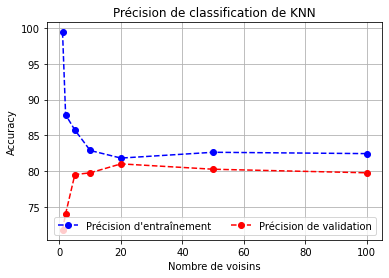

Hyperparamètre choisi: 20 voisins
Précision sur les données d'apprentissage: 82.7%
Précision sur les données de test: 82.0%

ALGORITHME 4: PCoA


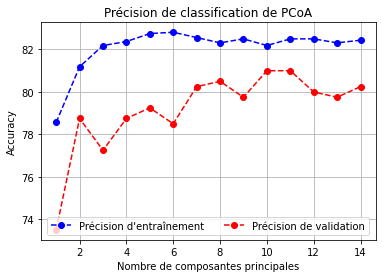

Hyperparamètre choisi: 10 composantes principales et 20 voisins
Précision sur les données d'apprentissage: 82.5%
Précision sur les données de test: 80.25%

ALGORITHME 5 Isomap


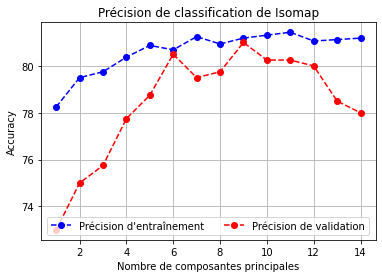

Hyperparamètre choisi: 9 composantes et 20 voisins
Précision sur les données d'apprentissage: 81.5%
Précision sur les données de test: 81.25%


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import algorithms as al

from sklearn.model_selection import train_test_split
#########################################################
#######################  ADULT  #########################
#########################################################

print('ADULT')
print('ADULT: DISSIMILARITÉ ORIGINALE')

# NOTE: Pour MNIST, on compare la précision avec la distance euclidienne. Étant
# donné que ADULT contient des données catégorielles, nous avons décidé de comparer
# notre performance des cinq algorithmes avec la précision obtenur dans la démo 2
# qui est environ de 81,0% de précision par kNN.

adult = pd.read_csv("adult.csv")
# On enlève les rangées avec les données manquantes. On travaille avec les données
# avec aucun point d'interrogation.
adult = adult[(adult != '?').all(axis = 1)]

# Échantillonnage des données ADULT

# On va prendre les 2400 premières données du fichier adult.csv (excluant les données ayant un champ '?')
# On va ensuite séparer en 2000 pour apprentissage (qui sera séparée encore en 1600-400 pour entraînement et validation)
# et en 400 pour les données de test.

n_total = 2400
adult = adult.head(n_total)
y = adult['income']
adult = adult.drop(['income'], axis = 1)

x_trainval, x_test, y_trainval, y_test = train_test_split(adult, y, test_size = (1/6), stratify=y, random_state=0)
x_train, x_valid, y_train, y_valid = train_test_split(x_trainval, y_trainval, test_size = (1/5), random_state=0)

x_trainval = x_trainval.values
x_train = x_train.values
x_valid = x_valid.values
x_test = x_test.values

# Remplacer les labels par 0 et 1 pour facilier les manipulations
y_trainval = y_trainval.replace({'<=50K': 0, '>50K': 1}).values
y_train = y_train.replace({'<=50K': 0, '>50K': 1}).values
y_valid = y_valid.replace({'<=50K': 0, '>50K': 1}).values
y_test = y_test.replace({'<=50K': 0, '>50K': 1}).values

# Vérification des dimensions des features
print(x_trainval.shape)
print(x_train.shape)
print(x_valid.shape)
print(x_test.shape)


# TEST DE MAJORITÉ
print(f'Nombre de personnes avec salaire <= 50K: {np.count_nonzero(y_test == 0)}')

y_train_majority = np.zeros(len(y_train))
y_test_majority = np.zeros(len(y_test))

acc_majority = al.calculate_accuracy(y_train, y_test, y_train_majority, y_test_majority)

print(f'\nTEST DE MAJORITÉ:')
print(f'Précision sur les données de test: {acc_majority[1]}%')



# MATRICE DE DISSIMILARITÉ ADULT
print('\nMATRICE DE DISSIMILARITÉ ADULT (Apprentissage)')
adult_diss_trainval = al.generate_matrix(al.dissimilarity_adult, x_trainval)

print('\nMATRICE DE DISSIMILARITÉ ADULT (Entraînement)')
adult_diss_train = al.generate_matrix(al.dissimilarity_adult, x_train)

print('\nMATRICE DE DISSIMILARITÉ ADULT (Validation)')
adult_diss_valid = al.generate_matrix(al.dissimilarity_adult, x_valid, x_train)

print('\nMATRICE DE DISSIMILARITÉ ADULT (Test)')
adult_diss_test = al.generate_matrix(al.dissimilarity_adult, x_test, x_trainval)



# Algorithme 1: KMédoïdes
print('\nALGORITHME 1: KMédoïdes')
adult_kmedoids = al.predict_kmedoids([0, 1], adult_diss_trainval, adult_diss_test)
acc_kmedoids = al.calculate_accuracy(y_trainval, y_test, adult_kmedoids[0], adult_kmedoids[1])

print(f'Précision sur les données d\'apprentissage: {acc_kmedoids[0]}%')
print(f'Précision sur les données de test: {acc_kmedoids[1]}%')



# Algorithme 2: Partition Binaire
print('\nALGORITHME 2: Partition Binaire')
adult_agglo = al.predict_agglo(10, adult_diss_trainval, adult_diss_test)
acc_agglo = al.calculate_accuracy(y_trainval, y_test, adult_agglo[0], adult_agglo[1])

print(f'Précision sur les données d\'apprentissage: {acc_agglo[0]}%')
print(f'Précision sur les données de test: {acc_agglo[1]}%')



# Algorithme 3: KNN
print('\nALGORITHME 3: kNN')

# Tester pour différents valeurs d'hyperparamètres
voisins = np.array([1, 2, 5, 10, 20, 50, 100])
acc_train = np.zeros(len(voisins))
acc_valid = np.zeros(len(voisins))

for i in range(len(voisins)):
    adult_knn = al.predict_knn(voisins[i], adult_diss_train, adult_diss_valid, y_train, True)
    acc_knn = al.calculate_accuracy(y_train, y_valid, adult_knn[0], adult_knn[1])

    acc_train[i] = acc_knn[0]
    acc_valid[i] = acc_knn[1]

# Graphique des précisions d'entraînement et de validation  
plt.plot(voisins, acc_train, linestyle='--', marker='o', color='b', label="Précision d'entraînement")
plt.plot(voisins, acc_valid, linestyle='--', marker='o', color='r', label="Précision de validation")
plt.legend(frameon=True, loc='lower center', ncol=2)
plt.xlabel('Nombre de voisins')
plt.ylabel('Accuracy')
plt.title('Précision de classification de KNN')
plt.grid(True)
plt.show()

# Prédiction sur la matrice de dissimilarité de test-trainval avec l'hyperparamètre optimal
adult_knn = al.predict_knn(20, adult_diss_trainval, adult_diss_test, y_trainval, True)
acc_knn = al.calculate_accuracy(y_trainval, y_test, adult_knn[0], adult_knn[1])

print(f'Hyperparamètre choisi: 20 voisins')
print(f'Précision sur les données d\'apprentissage: {acc_knn[0]}%')
print(f'Précision sur les données de test: {acc_knn[1]}%')



# Algorithme 4: PCoA
print('\nALGORITHME 4: PCoA')

# Tester pour différents valeurs d'hyperparamètres
components = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])
acc_train = np.zeros(len(components))
acc_valid = np.zeros(len(components))

for i in range(len(components)):
    adult_pcoa = al.predict_pcoa(components[i], adult_diss_train, adult_diss_valid, 20, y_train)
    acc_pcoa = al.calculate_accuracy(y_train, y_valid, adult_pcoa[0], adult_pcoa[1])

    acc_train[i] = acc_pcoa[0]
    acc_valid[i] = acc_pcoa[1]

# Graphique des précisions d'entraînement et de validation  
plt.plot(components, acc_train, linestyle='--', marker='o', color='b', label="Précision d'entraînement")
plt.plot(components, acc_valid, linestyle='--', marker='o', color='r', label="Précision de validation")
plt.legend(frameon=True, loc='lower center', ncol=2)
plt.xlabel('Nombre de composantes principales')
plt.ylabel('Accuracy')
plt.title('Précision de classification de PCoA')
plt.grid(True)
plt.show()

# Prédiction sur la matrice de dissimilarité de test-trainval avec l'hyperparamètre optimal
adult_pcoa = al.predict_pcoa(10, adult_diss_trainval, adult_diss_test, 20, y_trainval)
acc_pcoa = al.calculate_accuracy(y_trainval, y_test, adult_pcoa[0], adult_pcoa[1])

print(f'Hyperparamètre choisi: 10 composantes principales et 20 voisins kNN')
print(f'Précision sur les données d\'apprentissage: {acc_pcoa[0]}%')
print(f'Précision sur les données de test: {acc_pcoa[1]}%')



# Algorithme 5: Isomap
print('\nALGORITHME 5 Isomap')

# Tester pour différents valeurs d'hyperparamètres
components = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])
acc_train = np.zeros(len(components))
acc_valid = np.zeros(len(components))

for i in range(len(components)):
    adult_isomap = al.predict_isomap(components[i], adult_diss_train, adult_diss_valid, 20, y_train, 4)
    acc_isomap = al.calculate_accuracy(y_train, y_valid, adult_isomap[0], adult_isomap[1])

    acc_train[i] = acc_isomap[0]
    acc_valid[i] = acc_isomap[1]

# Graphique des précisions d'entraînement et de validation  
plt.plot(components, acc_train, linestyle='--', marker='o', color='b', label="Précision d'entraînement")
plt.plot(components, acc_valid, linestyle='--', marker='o', color='r', label="Précision de validation")
plt.legend(frameon=True, loc='lower center', ncol=2)
plt.xlabel('Nombre de composantes principales')
plt.ylabel('Accuracy')
plt.title('Précision de classification de Isomap')
plt.grid(True)
plt.show()

# Prédiction sur la matrice de dissimilarité de test-trainval avec l'hyperparamètre optimal
adult_isomap = al.predict_isomap(9, adult_diss_trainval, adult_diss_test, 20, y_trainval, 4)
acc_isomap = al.calculate_accuracy(y_trainval, y_test, adult_isomap[0], adult_isomap[1])

print(f'Hyperparamètre choisi: 9 composantes et 20 voisins kNN')
print(f'Précision sur les données d\'apprentissage: {acc_isomap[0]}%')
print(f'Précision sur les données de test: {acc_isomap[1]}%')